# Model Training

### 1.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df= pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math score'])

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [9]:
#Create columns with Transformer 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import   ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [10]:
X = preprocessor.fit_transformy(X)

AttributeError: 'ColumnTransformer' object has no attribute 'fit_transformy'

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
# separate dataset into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Functions to give all metrics after model Training

In [ ]:
from sklearn.metrics import mean_absolute_error


def evaluate_model(true, predicted):
    mae= mean_absolute_error(true,predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square
    

In [ ]:
models ={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred= model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_r2))
    print("- R2 Score: {:4f}".format(model_train_r2))

    print('--------------------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_r2))
    print("- R2 Score: {:4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model Performance for Training set
- Root Mean Square Error: 5.3402
- Mean Absolute Error: 0.8735
- R2 Score: 0.873507
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.4214
- Mean Absolute Error: 0.8792
- R2 Score: 0.879216


Lasso
Model Performance for Training set
- Root Mean Square Error: 6.5938
- Mean Absolute Error: 0.8071
- R2 Score: 0.807146
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 6.5197
- Mean Absolute Error: 0.8253
- R2 Score: 0.825320


Ridge
Model Performance for Training set
- Root Mean Square Error: 5.3233
- Mean Absolute Error: 0.8743
- R2 Score: 0.874304
--------------------------------------------------------
Model performance for Test set
- Root Mean Square Error: 5.3904
- Mean Absolute Error: 0.8806
- R2 Score: 0.880593


K-Neighbors Regression
Model Performance for Training set
- Root Mean Square Error: 5.7077
-

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879216
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.849665
8,AdaBoost Regressor,0.842119
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regression,0.783813
4,Decision Tree,0.746957


## Linear Regression 

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score= r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.92


Text(0, 0.5, 'Predict')

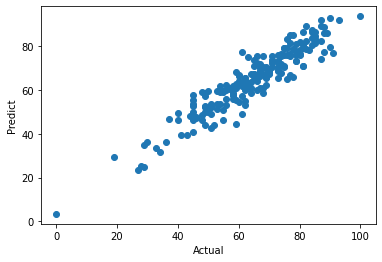

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')

<AxesSubplot:xlabel='math score'>

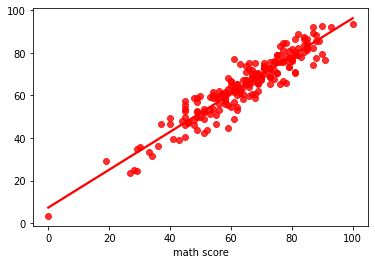

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [ ]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
